    
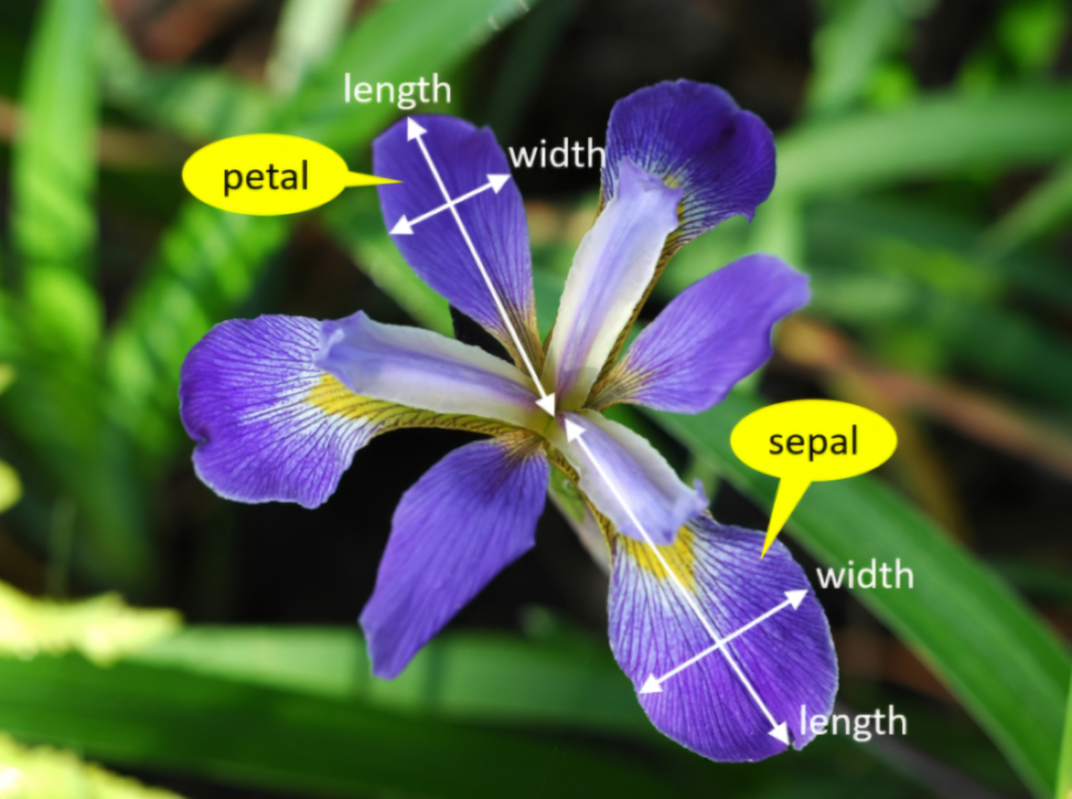

For this example, we are going to use the data available on Kaggle:
https://www.kaggle.com/datasets/uciml/iris

This dataset contains four features: petal length and width, and sepal lenth and width. It also contains three categories for Iris: Setosa, Virginica, and Versicolor. The purpose of this example is to use KNN to classify the Iris flowers into either of the three categories based on their four features. 

You have to first create an account on Kaggle. You can then download the file (in zip format) on your computer. 
After downloading the file, open it and copy & paste the file in the same folder where you already have created your Jupyter notebook. 

In [26]:
#Import the necessary packages first

import numpy as np #numpy package helps you to process arrays
import pandas as pd #pandas package helps you to process matrices (dataframes)


In [14]:
#Load data into Python 

iris_data=pd.read_csv('Iris.csv') #this reads the Iris.csv dataset (that I have already downloaded in the same folder) and puts it into an object called iris_data
print(iris_data) #this prints the first and last five rows in the dataset

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [18]:
iris_data.head() #this prints the first five observations in a nicer format


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
iris_data.info() #this gives some information about the data (number of rows, columns and their type, etc.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [20]:
iris_data.dtypes #gives the infomration about data types only

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [38]:
import matplotlib.pyplot as plt #matplotlib package helps you to create plots
import seaborn as sns #seaborn package helps you to create enhanced visualizations 
%matplotlib inline 
#shows the plots within the same page, makes it easier to work with plots in Jupyter

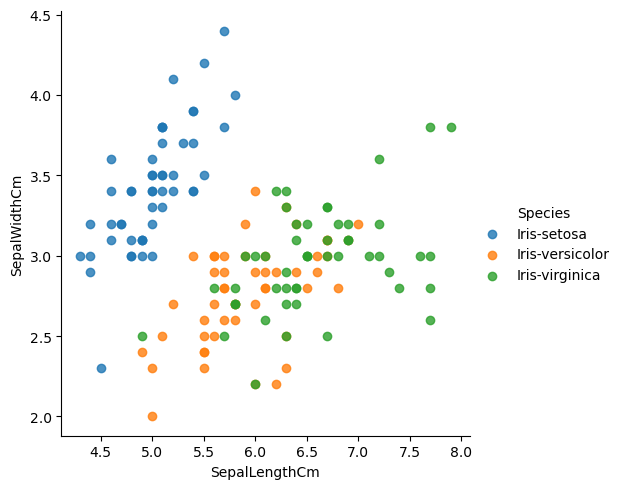

In [31]:
sns.lmplot(x='SepalLengthCm', y='SepalWidthCm', data=iris_data, hue='Species', fit_reg=False) #lmplot creates scatter plots

In [37]:
#preprocessing data to transform categorical variables into numeric variables 
from sklearn.preprocessing import OrdinalEncoder 
ord_enc = OrdinalEncoder()
iris_data["Species_Code"] = ord_enc.fit_transform(iris_data[["Species"]])
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_Code
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0.0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0.0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0.0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0.0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0.0


In [42]:
#split data into features and targets
X=iris_data.drop(columns=['Species','Species_Code']) #X is the features data
X.head()
y=iris_data['Species_Code'] #y is the label array
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Species_Code, dtype: float64

In [53]:
#split data into training and testing dataset
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state=1984)
X_train.info()
y_test.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 96 to 111
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             100 non-null    int64  
 1   SepalLengthCm  100 non-null    float64
 2   SepalWidthCm   100 non-null    float64
 3   PetalLengthCm  100 non-null    float64
 4   PetalWidthCm   100 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 4.7 KB


75     1.0
114    2.0
118    2.0
55     1.0
20     0.0
Name: Species_Code, dtype: float64

In [60]:
#import KNN classifier
from sklearn.neighbors import KNeighborsClassifier # KNeighborsClassifier is the KNN machine learning algorithem
KNN = KNeighborsClassifier(n_neighbors=20) #KNN is a function that we create for KNN with K=1 

In [61]:
#train KNN with K=1 on X_train and y_train datasets
KNN.fit(X_trian, y_train)

KNeighborsClassifier(n_neighbors=20)

In [62]:
import warnings
warnings.filterwarnings('ignore')

In [63]:
#Use the trained KNN algorithem to predict the lables based on features in X_test
y_pred=KNN.predict(X_test)

In [64]:
print(y_pred)

[1. 2. 2. 1. 0. 2. 2. 1. 1. 0. 0. 1. 2. 1. 0. 1. 1. 0. 2. 0. 1. 1. 1. 1.
 0. 1. 2. 2. 2. 1. 0. 2. 0. 0. 2. 0. 2. 0. 1. 2. 1. 0. 1. 0. 1. 1. 2. 1.
 1. 1.]


In [65]:
print(np.mean(y_pred==y_test)) #calculates the accuracy of KNN model based on comparing the predictions with reality 

0.96
